In [254]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score

X = pd.read_csv(r"../data/df_X.csv", engine="pyarrow")
y= pd.read_csv(r"../data/df_y.csv", engine="pyarrow")

# Decision Tree

## Cross validation para achar o melhor depth

Melhor max_depth: 13
Acurácia média: 0.6616


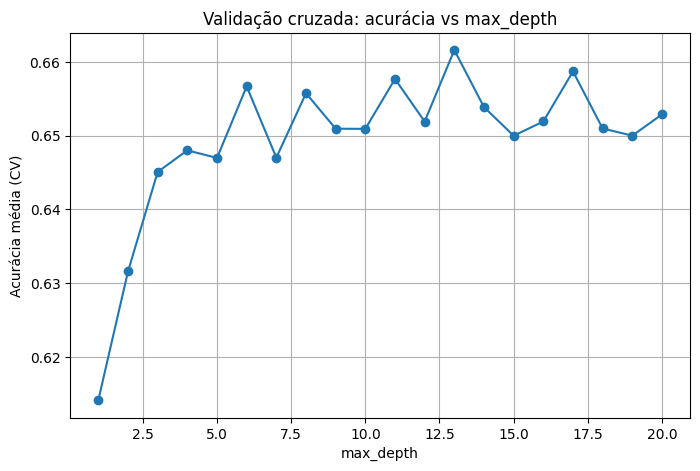

In [255]:
from sklearn.model_selection import cross_val_score

lista_depths = range(1, 21)
mean_scores = []

# Validação cruzada para cada profundidade
for depth in lista_depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
    mean_scores.append(scores.mean())

# Encontrar a melhor profundidade
melhor_depth = lista_depths[np.argmax(mean_scores)]
melhor_score = max(mean_scores)

print(f"Melhor max_depth: {melhor_depth}")
print(f"Acurácia média: {melhor_score:.4f}")

# Plotar gráfico
plt.figure(figsize=(8, 5))
plt.plot(lista_depths, mean_scores, marker='o')
plt.title('Validação cruzada: acurácia vs max_depth')
plt.xlabel('max_depth')
plt.ylabel('Acurácia média (CV)')
plt.grid(True)
plt.show()


## Decision Tree 

In [256]:
#usar o melhor depth nao deu certo, ele esta levando em consideração apenas a acuracia. Não consegui fazer um código que levasse m consideração a média de todos os scores
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42, max_depth= melhor_depth)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)     

print(f"Acurácia      : {acc:.2f}")
print(f"Precisão      : {prec:.2f}")
print(f"Recall        : {rec:.2f}")

Acurácia      : 0.69
Precisão      : 0.68
Recall        : 0.71


                        Feature  Importância (Gini)
4                      Duration            0.242558
3                 Credit amount            0.225034
0                           Age            0.207586
2               Saving accounts            0.080216
1                           Job            0.047233
11                  Purpose_car            0.036207
9                  Housing_rent            0.023526
15             Purpose_radio/TV            0.023176
7                  Housing_free            0.023102
5                    Sex_female            0.021574
13  Purpose_furniture/equipment            0.017982
12            Purpose_education            0.016720
6                      Sex_male            0.010977
8                   Housing_own            0.009527
14               Purpose_others            0.007774
10             Purpose_business            0.006807


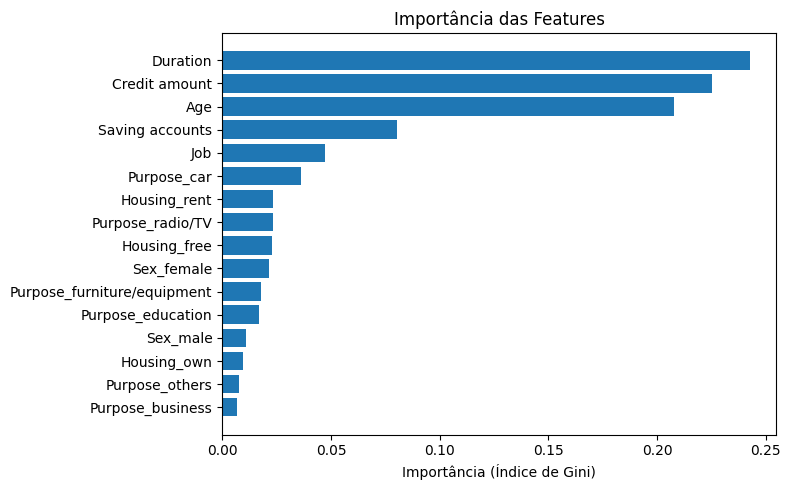

Número de features selecionadas: 4
Features selecionadas: ['Age', 'Saving accounts', 'Credit amount', 'Duration']


c:\Users\PUC\T1-INF1038\venv\Lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [257]:
#usando Gini para decidir quais variaveis entram para o modelo

from sklearn.feature_selection import SelectFromModel

importancias = model.feature_importances_
feature_names = X.columns

importancia_df = pd.DataFrame({
    'Feature': feature_names,
    'Importância (Gini)': importancias
}).sort_values(by='Importância (Gini)', ascending=False)

print(importancia_df)

plt.figure(figsize=(8, 5))
plt.barh(importancia_df['Feature'], importancia_df['Importância (Gini)'])
plt.xlabel('Importância (Índice de Gini)')
plt.title('Importância das Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

selector = SelectFromModel(model, prefit=True, threshold='mean')
X_reduzido = selector.transform(X)

print(f"Número de features selecionadas: {X_reduzido.shape[1]}")
print("Features selecionadas:", X.columns[selector.get_support()].tolist())

In [258]:
X_train, X_test, y_train, y_test = train_test_split(X_reduzido, y, test_size=0.2, random_state=42, stratify=y)

model = DecisionTreeClassifier(random_state=42, max_depth=10)
model.fit(X_train, y_train)
probs = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)     

print(f"Acurácia      : {acc:.2f}")
print(f"Precisão      : {prec:.2f}")
print(f"Recall        : {rec:.2f}")

Acurácia      : 0.65
Precisão      : 0.65
Recall        : 0.62
